In [1]:
#Module configuration
#from py2neo import Graph #Database connection
import neomodel
import pandas as pd
import datetime
import numpy as np
import torch

In [2]:
from neomodel import config

neo4jServerAdress = "172.19.144.105"
neo4jConnectionPort = 7687  #Connection to server bolt
user= "neo4j" 
password= "Mypassword%2023"
config.DATABASE_URL='bolt://' +user + ':' + password + '@' + neo4jServerAdress + ':' + str(neo4jConnectionPort)

In [3]:
from neomodel import (config, StructuredNode, StringProperty, IntegerProperty,DateTimeProperty,
                    DateTimeFormatProperty,UniqueIdProperty, RelationshipTo,StructuredRel)

config.DATABASE_URL='bolt://' +user + ':' + password + '@' + neo4jServerAdress + ':' + str(neo4jConnectionPort)

#NIP	J_Parcours	DateDebutActe	DateFinActe	UF	Service	Phase_Parcours	Activite	Dimension_Parcours	Ref_Acte	id_Sequence	Type_Sequence	id_sejour

class FOLLOWED_BY(StructuredRel):
    Nb_Days = IntegerProperty(index=True, default=0)
    NIP=StringProperty(required=False)

class Acte(StructuredNode):
    Ref_Acte = StringProperty(required=True)
    J_Parcours=IntegerProperty(required=False)
    Duree = IntegerProperty(required=False)
    UF = StringProperty(required=False)
    #Service = StringProperty(required=True)
    #Phase_Parcours =StringProperty(required=True)
    #Activite =StringProperty(required=True)
    #Dimension_Parcours = StringProperty(required=True)
    Nombre_actes=IntegerProperty(required=False, default=1)     
    Carepath = RelationshipTo('Acte', 'FOLLOWED_BY', model=FOLLOWED_BY)

class Patient(StructuredNode):
    NIP = StringProperty(unique_index=True, required=True)
    J0 = StringProperty(required=True)
    J_Parcours = IntegerProperty(required=False, default=0)
    Carepath = RelationshipTo('Acte', 'BEGIN_CAREPATH_WITH', model=FOLLOWED_BY)

In [4]:
# Define the filepath of the import csvfile
file_path = r'..\01_Datasets\Dataset_Simple_V0.csv'
# Read the CSV file into a DataFrame
df = pd.read_csv(file_path, sep=';')
# Display the first few rows of the DataFrame
df


,NIP,J_Parcours,DateDebutActe,DateFinActe,UF,Service,Phase_Parcours,Activite,Dimension_Parcours,Ref_Acte,id_Sequence,Type_Sequence,id_sejour
0,NIP1,0,2019-01-02 00:00:00.000,2019-01-02 00:00:00.000,80,Med,Ph1,Ac1,Dim1,Ref1,Seq1,TSEQ1,IDSej1
1,NIP1,2,2019-01-04 00:00:00.000,2019-01-04 00:00:00.000,81,Med,Ph2,Ac2,Dim2,Ref2,Seq2,TSEQ2,IDSej2
2,NIP1,4,2019-01-06 00:00:00.000,2019-01-06 00:00:00.000,82,Med,Ph3,Ac3,Dim3,Ref3,Seq3,TSEQ3,IDSej3
3,NIP1,6,2019-01-08 00:00:00.000,2019-01-08 00:00:00.000,83,Med,Ph4,Ac4,Dim4,Ref4,Seq4,TSEQ4,IDSej4
4,NIP1,8,2019-01-10 00:00:00.000,2019-01-10 00:00:00.000,84,Med,Ph5,Ac5,Dim5,Ref5,Seq5,TSEQ5,IDSej5
5,NIP1,10,2019-01-12 00:00:00.000,2019-01-12 00:00:00.000,85,Med,Ph6,Ac6,Dim6,Ref6,Seq6,TSEQ6,IDSej6
6,NIP2,0,2019-02-02 00:00:00.000,2019-02-02 00:00:00.000,80,Med,Ph1,Ac1,Dim1,Ref1,Seq1,TSEQ1,IDSej7
7,NIP2,2,2019-02-04 00:00:00.000,2019-02-04 00:00:00.000,81,Med,Ph2,Ac2,Dim2,Ref2,Seq2,TSEQ2,IDSej8
8,NIP2,4,2019-02-06 00:00:00.000,2019-02-06 00:00:00.000,82,Med,Ph3,Ac3,Dim3,Ref3,Seq3,TSEQ3,IDSej9
9,NIP2,6,2019-02-08 00:00:00.000,2019-02-08 00:00:00.000,83,Med,Ph4,Ac4,Dim4,Ref4,Seq4,TSEQ4,IDSej10


In [5]:
#Function to extract information from a row
date_format = '%Y-%m-%d %H:%M:%S.%f'

def extract_data(row):
    from datetime import datetime
    acte = {
        'Jp': row.get('J_Parcours', None),
        'DDA': datetime.strptime(row.get('DateDebutActe', None), date_format),
        'DDF': datetime.strptime(row.get('DateFinActe', None), date_format),
        'Ref': row.get('Ref_Acte', None),
        'NIP': row.get('NIP', None),
        'UFname': str(row.get('UF', None)),
        'service': row.get('Service', None),
        'phase_parcours': row.get('Phase_Parcours', None).replace(" ", ""),
        'activite': row.get('Activite', None),
        'dim_parcours': row.get('Dimension_Parcours', None),
        'Sequence_id': row.get('id_Sequence', None),
        'Sequence_Type': row.get('Type_Sequence', None),
        'Sejour_id': row.get('id_sejour', None)
    }

    return acte

In [6]:
#Define a query function
def myquery(query, params=None):
    from neomodel import db
    results, meta = db.cypher_query(query, params, resolve_objects=True)
    
    
    return results, meta

In [7]:
#Append to a node tuple

def myappend(alist,value):
    if not isinstance(alist, list):
        newlist=[alist]
    else:
        newlist=alist
    newlist.append(value)

    return newlist

In [8]:
#Define a function to create a new acte 
def create_acte(myActe):
    new_acte=Acte(
                    Ref_Acte = myActe['Ref'],
                    #Duree = int((myActe['DDF'] - myActe['DDA']).total_seconds()),
                    J_Parcours = myActe['Jp'],
                    #UF = myActe['UFname'],
                    #Service = myActe['service'],
                    #Phase_Parcours = myActe['phase_parcours'],
                    #Activite = myActe['activite'],
                    #Dimension_Parcours = myActe['dim_parcours'],
                ).save()
    return new_acte

def update_acte(myNodeActe, myNewActe):
    
    #Check if J_Parcours is th same between NodeActe and NewActe

    if myNodeActe.J_Parcours==myNewActe['Jp']:
        myNodeActe.Ref_Acte=myappend(myNodeActe.Ref_Acte,myNewActe['Ref'])
        #myNodeActe.UF=myappend(myNodeActe.UF,myNewActe['UFname'])
        #myNodeActe.Service=myappend(myNodeActe.Service,myNewActe['service'])
        #myNodeActe.Phase_Parcours=myappend(myNodeActe.Phase_Parcours,myNewActe['phase_parcours'])
        #myNodeActe.Activite=myappend(myNodeActe.Activite,myNewActe['activite'])
        #myNodeActe.Dimension_Parcours=myappend(myNodeActe.Dimension_Parcours,myNewActe['dim_parcours'])
        #myNodeActe.Nombre_actes=myNodeActe.Nombre_actes+1
        myNodeActe.save()
        
    else:
        raise (f"Error in Updating Node {myNodeActe.id}, the new Acte doesn't have the same J parcours !")

    return myNodeActe


def create_Startnode(myActe):
    startNode=Patient(
                    NIP = myActe['NIP'],
                    J0 = myActe['DDA']
                    ).save()
    return startNode

In [9]:
#MODELIZATION 5 : 
#NOEUDS : ACTES , DIFFERENTIATED BY PHASE PARCOURS.
#RELATIONS : 
    # START : for the first acte
    # ACTES REALIZED BY DAY

#INITIALISATION   #CLEAR THE DATABASE
query="MATCH (n) DETACH DELETE n"
myquery(query)

Start=True
output=True

# Iterate over the rows of the DataFrame
for index, row in df.iterrows():
    # Extract values from the DataFrame
    myActe = extract_data(row)

    if Start:
        #Create a new acte
        new_acte=create_acte(myActe)
        Active_Node=new_acte
        
        #Create a start node
        startNode=create_Startnode(myActe)

        #LINK THE START NODE TO THE ACTES
        startNode.Carepath.connect(new_acte)
        Start=False

        #SET THE START NODE AS THE PREVIOUS NODE
        Previous_Node=startNode

    else:
        if oldActe['NIP']!=myActe['NIP']: #Check if we are dealing with the same patient
            #Create a new acte
            new_acte=create_acte(myActe)
            
            Active_Node=new_acte
            
            #Create a start node
            startNode=create_Startnode(myActe)

            #LINK THE START NODE TO THE ACTES
            startNode.Carepath.connect(new_acte)
            #SET THE START NODE AS THE PREVIOUS NODE
            Previous_Node=startNode

        else:            
            #Check if we have to change the previous node
            if myActe['Jp']!=oldActe['Jp']:
                #Create a new acte
                new_acte=create_acte(myActe)

                Previous_Node=Active_Node
                Active_Node=new_acte

                #LINK THE ACTE TO THE PREVIOUS ONE
                Previous_Node.Carepath.connect(new_acte, {'Nb_Days': myActe['Jp']-Previous_Node.J_Parcours ,'NIP': myActe['NIP'] })

            else:
                #update the active node
                new_acte=update_acte(Active_Node,myActe)
                #Active_Nodes.append(new_acte)

    #Store the acte in a variable oldActe
    oldActe=myActe


In [10]:
#List exsiting graph in the database
from neomodel import db
query = """
CALL gds.graph.list()
YIELD graphName, nodeCount, relationshipCount
RETURN graphName, nodeCount, relationshipCount
ORDER BY graphName ASC
"""
results = db.cypher_query(query)
results

([['Mygraph', 48, 40]], ['graphName', 'nodeCount', 'relationshipCount'])

In [11]:

#delete all existings graphs
for graph in results[0]:
    query = f"""
            CALL gds.graph.drop('{graph[0]}') YIELD graphName;
            """
    results = db.cypher_query(query)

In [12]:
#Node Embedings

#Create an in-Memory graph:
query = """
CALL gds.graph.project(
  'Mygraph',
  'Acte',
  'FOLLOWED_BY',
  {
    relationshipProperties: 'Nb_Days'
  }
)
"""
results = db.cypher_query(query)


In [13]:
# If you need to specify a number of dimension :
#CALL gds.node2vec.stream('Mygraph', {embeddingDimension: 2})
#If you don't need to specify a number of dimension:
#CALL gds.node2vec.stream('Mygraph')

#run the node2vec algorithm:
query = """
CALL gds.node2vec.stream('Mygraph', {embeddingDimension: 6})
YIELD nodeId, embedding
RETURN nodeId, embedding
"""

from neomodel import db
results = db.cypher_query(query)

nb_ebemdings_dimensions=len(results[0][0][1])

In [14]:
#convert the result variable into a dict
Dict_embedings = {}

for entry in results[0]:
    node_id = entry[0]
    embedding = entry[1]
    Dict_embedings[node_id] = {'Embedding': embedding}

In [15]:
#add a zero acte at index zero
Dict_embedings[0] = {'Embedding': np.zeros(nb_ebemdings_dimensions) }

In [16]:
#GET THE LIST OF PATIENT IN THE DATABASE

query="""MATCH (n:Patient) RETURN n.NIP"""
list_of_NIPs = db.cypher_query(query)

In [17]:
list_of_NIPs[0]

[['NIP1'],
 ['NIP2'],
 ['NIP3'],
 ['NIP4'],
 ['NIP5'],
 ['NIP6'],
 ['NIP7'],
 ['NIP8']]

In [18]:
#GET THE LIST OF NODES_ID OF THE CAREPATH OF EACH PATIENT

NIP_Carepath={}
max_Carepath_lenght=0

for i,nip in enumerate(list_of_NIPs[0],start=1):
    
    list_of_Nodes_ID=[]
    Partial_Carepath=[]

    query=f"""
        MATCH (n:Acte)-[l:FOLLOWED_BY]->(m:Acte)
        WHERE l.NIP='{nip[0]}'
        RETURN id(n) AS NodeID, id(m) AS RelatedNodeID
        ORDER BY NodeID asc
        """
    list_of_Nodes_ID = db.cypher_query(query)

    Carepath=[]
    for j,relation in enumerate(list_of_Nodes_ID[0],start=0):
        Carepath.append(relation[0])
        lastnode=relation[1]

        #Partial Carepath
        if len(Carepath)>1 :
            Partial_Carepath.append(Carepath.copy())

    #construct the list
    Carepath.append(lastnode)
    #Partial Carepath
    Partial_Carepath.append(Carepath.copy())

    #Add the carepath to the dict
    NIP_Carepath[i]={'NIP' : nip[0], 'Carepath' : Carepath, 'SampleCareMatrix' : Partial_Carepath}
    
    #udpate the max Carepath lenght
    if max_Carepath_lenght<len(Carepath) : max_Carepath_lenght=len(Carepath)

#NIP_Carepath


In [19]:
NIP_Carepath

{1: {'NIP': 'NIP1',
  'Carepath': [19322, 19324, 19325, 19326, 19327, 19328],
  'SampleCareMatrix': [[19322, 19324],
   [19322, 19324, 19325],
   [19322, 19324, 19325, 19326],
   [19322, 19324, 19325, 19326, 19327],
   [19322, 19324, 19325, 19326, 19327, 19328]]},
 2: {'NIP': 'NIP2',
  'Carepath': [19329, 19331, 19332, 19333, 19334, 19335],
  'SampleCareMatrix': [[19329, 19331],
   [19329, 19331, 19332],
   [19329, 19331, 19332, 19333],
   [19329, 19331, 19332, 19333, 19334],
   [19329, 19331, 19332, 19333, 19334, 19335]]},
 3: {'NIP': 'NIP3',
  'Carepath': [19336, 19338, 19339, 19340, 19341, 19342],
  'SampleCareMatrix': [[19336, 19338],
   [19336, 19338, 19339],
   [19336, 19338, 19339, 19340],
   [19336, 19338, 19339, 19340, 19341],
   [19336, 19338, 19339, 19340, 19341, 19342]]},
 4: {'NIP': 'NIP4',
  'Carepath': [19343, 19345, 19346, 19347, 19348, 19349],
  'SampleCareMatrix': [[19343, 19345],
   [19343, 19345, 19346],
   [19343, 19345, 19346, 19347],
   [19343, 19345, 19346, 1934

In [20]:
#Construct the SampleMatrix to a determined dimension and fill zeros at the left when dimension isn't enought

#determine the size of X (nb of columns)
#Maximum lenght of carepath in the database
nb_columns=max_Carepath_lenght
#nb_columns=2

#or a definite value
#nb_columns=2

#Croop the matrix to the number of column defined
#for key, value in NIP_Carepath.items():
#    value['SampleCareMatrix'] = [sample[-nb_columns:] for sample in value['SampleCareMatrix']]

#Add zeros at the left when the size of the sampleCareMatrix is less than to the nb of column defined
#for key, value in NIP_Carepath.items():
#    for sample in value['SampleCareMatrix']:
#        while len(sample) < nb_columns:
#            sample.insert(0, 0)

#NIP_Carepath

In [21]:
NIP_Carepath

{1: {'NIP': 'NIP1',
  'Carepath': [19322, 19324, 19325, 19326, 19327, 19328],
  'SampleCareMatrix': [[19322, 19324],
   [19322, 19324, 19325],
   [19322, 19324, 19325, 19326],
   [19322, 19324, 19325, 19326, 19327],
   [19322, 19324, 19325, 19326, 19327, 19328]]},
 2: {'NIP': 'NIP2',
  'Carepath': [19329, 19331, 19332, 19333, 19334, 19335],
  'SampleCareMatrix': [[19329, 19331],
   [19329, 19331, 19332],
   [19329, 19331, 19332, 19333],
   [19329, 19331, 19332, 19333, 19334],
   [19329, 19331, 19332, 19333, 19334, 19335]]},
 3: {'NIP': 'NIP3',
  'Carepath': [19336, 19338, 19339, 19340, 19341, 19342],
  'SampleCareMatrix': [[19336, 19338],
   [19336, 19338, 19339],
   [19336, 19338, 19339, 19340],
   [19336, 19338, 19339, 19340, 19341],
   [19336, 19338, 19339, 19340, 19341, 19342]]},
 4: {'NIP': 'NIP4',
  'Carepath': [19343, 19345, 19346, 19347, 19348, 19349],
  'SampleCareMatrix': [[19343, 19345],
   [19343, 19345, 19346],
   [19343, 19345, 19346, 19347],
   [19343, 19345, 19346, 1934

In [22]:
n_actes=len(Dict_embedings)
n_actes

49

In [23]:


def carepath_to_tensor(carepath):
    """Convert a name into a matrix where each row one-hot encodes a character."""
    tensor = torch.zeros(len(carepath), nb_ebemdings_dimensions)
    for idx, acte in enumerate(carepath):
        tensor[idx] = torch.tensor(Dict_embedings[acte]['Embedding'])
    return tensor

In [24]:
NIP_Carepath[1]

{'NIP': 'NIP1',
 'Carepath': [19322, 19324, 19325, 19326, 19327, 19328],
 'SampleCareMatrix': [[19322, 19324],
  [19322, 19324, 19325],
  [19322, 19324, 19325, 19326],
  [19322, 19324, 19325, 19326, 19327],
  [19322, 19324, 19325, 19326, 19327, 19328]]}

In [25]:
#Construct the SampleMatrix to a determined dimension and fill zeros at the left when dimension isn't enought

#determine the size of X (nb of columns)
#Maximum lenght of carepath in the database
nb_columns=max_Carepath_lenght
#nb_columns=2

#or a definite value
#nb_columns=2

#Croop the matrix to the number of column defined
for key, value in NIP_Carepath.items():
    value['SampleCareMatrix'] = [sample[-nb_columns:] for sample in value['SampleCareMatrix']]

#Add zeros at the left when the size of the sampleCareMatrix is less than to the nb of column defined
for key, value in NIP_Carepath.items():
    for sample in value['SampleCareMatrix']:
        while len(sample) < nb_columns:
            sample.insert(0, 0)

#NIP_Carepath

In [26]:
NIP_Carepath

{1: {'NIP': 'NIP1',
  'Carepath': [19322, 19324, 19325, 19326, 19327, 19328],
  'SampleCareMatrix': [[0, 0, 0, 0, 19322, 19324],
   [0, 0, 0, 19322, 19324, 19325],
   [0, 0, 19322, 19324, 19325, 19326],
   [0, 19322, 19324, 19325, 19326, 19327],
   [19322, 19324, 19325, 19326, 19327, 19328]]},
 2: {'NIP': 'NIP2',
  'Carepath': [19329, 19331, 19332, 19333, 19334, 19335],
  'SampleCareMatrix': [[0, 0, 0, 0, 19329, 19331],
   [0, 0, 0, 19329, 19331, 19332],
   [0, 0, 19329, 19331, 19332, 19333],
   [0, 19329, 19331, 19332, 19333, 19334],
   [19329, 19331, 19332, 19333, 19334, 19335]]},
 3: {'NIP': 'NIP3',
  'Carepath': [19336, 19338, 19339, 19340, 19341, 19342],
  'SampleCareMatrix': [[0, 0, 0, 0, 19336, 19338],
   [0, 0, 0, 19336, 19338, 19339],
   [0, 0, 19336, 19338, 19339, 19340],
   [0, 19336, 19338, 19339, 19340, 19341],
   [19336, 19338, 19339, 19340, 19341, 19342]]},
 4: {'NIP': 'NIP4',
  'Carepath': [19343, 19345, 19346, 19347, 19348, 19349],
  'SampleCareMatrix': [[0, 0, 0, 0, 1

In [27]:
NIP_Carepath[1]['SampleCareMatrix'][2]

[0, 0, 19322, 19324, 19325, 19326]

In [28]:
carepath_to_tensor(NIP_Carepath[1]['SampleCareMatrix'][2])

tensor([[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [-0.0774, -0.0012,  0.0681,  0.0057, -0.0781,  0.0574],
        [-0.0411, -0.0642,  0.0477,  0.0842, -0.0387, -0.0022],
        [-0.0565, -0.0814,  0.0274,  0.0640, -0.0588,  0.0565],
        [-0.0450, -0.0512, -0.0444,  0.0353, -0.0015,  0.0116]])

In [29]:
NIP_Carepath[1]['SampleCareMatrix']

[[0, 0, 0, 0, 19322, 19324],
 [0, 0, 0, 19322, 19324, 19325],
 [0, 0, 19322, 19324, 19325, 19326],
 [0, 19322, 19324, 19325, 19326, 19327],
 [19322, 19324, 19325, 19326, 19327, 19328]]

In [30]:
#Let's construct a function Vec_to_Node in order to construct the prevision of carepath.

#function Vec_2_node
def Vec_2_node(query_vector, embeddings):
    closest_node_id = None
    closest_distance = float('inf')
    
    for node_id, node_embedding in embeddings.items():
        embedding_vector = node_embedding['Embedding']
        distance = np.linalg.norm(query_vector - embedding_vector)  # Euclidean distance
        if distance < closest_distance:
            closest_distance = distance
            closest_node_id = node_id
            
    return closest_node_id

# Example usage
#query_vector = np.array([0.5, 0.3, -0.1])  # Example vector you want to find the node for
#closest_node_id = Vec_2_node(query_vector, Dict_embedings)


In [31]:
nb_NIP=len(NIP_Carepath)
my_NIP_indexes_list = [i for i in range(1, nb_NIP+1)]
my_NIP_indexes_list

[1, 2, 3, 4, 5, 6, 7, 8]

In [32]:
import random

split = 0.85

training = {}
testing = {}

print('ordered')
print(my_NIP_indexes_list)
random.shuffle(my_NIP_indexes_list)  # Shuffle the Carepath list
print('shuffled')
print(my_NIP_indexes_list)

split_index = int(len(my_NIP_indexes_list) * split)

training_ids = my_NIP_indexes_list[:split_index]
testing_ids = my_NIP_indexes_list[split_index:]

print('training')
print(training_ids)

print('test')
print(testing_ids)


ordered
[1, 2, 3, 4, 5, 6, 7, 8]
shuffled
[4, 2, 8, 7, 5, 6, 3, 1]
training
[4, 2, 8, 7, 5, 6]
test
[3, 1]


In [33]:
training_ids

[4, 2, 8, 7, 5, 6]

In [34]:
def ids_to_tensor(list_NIP_ids):
    Training_tensors=[]

    for id_NIP in list_NIP_ids:
        for carepathsample_index in range(len(NIP_Carepath[id_NIP]['SampleCareMatrix'])):
            #print(NIP_Carepath[id_NIP]['SampleCareMatrix'][carepathsample_index])
            #print('Associated Tensor')
            tensor=carepath_to_tensor(NIP_Carepath[id_NIP]['SampleCareMatrix'][carepathsample_index])
            #print(tensor)
            Training_tensors.append(tensor)

    # Concatenate the tensors along dimension 0
    Training_tensor = torch.stack(Training_tensors, dim=0)

    return Training_tensor

In [35]:
Training   = ids_to_tensor(training_ids)
Testing     = ids_to_tensor(testing_ids)

In [36]:
Training.shape

torch.Size([30, 6, 6])

In [37]:
NIP_Carepath

{1: {'NIP': 'NIP1',
  'Carepath': [19322, 19324, 19325, 19326, 19327, 19328],
  'SampleCareMatrix': [[0, 0, 0, 0, 19322, 19324],
   [0, 0, 0, 19322, 19324, 19325],
   [0, 0, 19322, 19324, 19325, 19326],
   [0, 19322, 19324, 19325, 19326, 19327],
   [19322, 19324, 19325, 19326, 19327, 19328]]},
 2: {'NIP': 'NIP2',
  'Carepath': [19329, 19331, 19332, 19333, 19334, 19335],
  'SampleCareMatrix': [[0, 0, 0, 0, 19329, 19331],
   [0, 0, 0, 19329, 19331, 19332],
   [0, 0, 19329, 19331, 19332, 19333],
   [0, 19329, 19331, 19332, 19333, 19334],
   [19329, 19331, 19332, 19333, 19334, 19335]]},
 3: {'NIP': 'NIP3',
  'Carepath': [19336, 19338, 19339, 19340, 19341, 19342],
  'SampleCareMatrix': [[0, 0, 0, 0, 19336, 19338],
   [0, 0, 0, 19336, 19338, 19339],
   [0, 0, 19336, 19338, 19339, 19340],
   [0, 19336, 19338, 19339, 19340, 19341],
   [19336, 19338, 19339, 19340, 19341, 19342]]},
 4: {'NIP': 'NIP4',
  'Carepath': [19343, 19345, 19346, 19347, 19348, 19349],
  'SampleCareMatrix': [[0, 0, 0, 0, 1

DEEP LEARNING ANALYSIS

In [38]:
def sample_care_matrix_without_last(data):
    care_matrix_without_last = []

    for sublist in data['SampleCareMatrix']:
        care_matrix_without_last.append(sublist[:-1])

    return care_matrix_without_last

def sample_care_matrix_last_items(data):
    last_items = [sublist[-1] for sublist in data['SampleCareMatrix']]
    return last_items



In [39]:
sample_care_matrix_last_items(NIP_Carepath[1])

[19324, 19325, 19326, 19327, 19328]

In [40]:
sample_care_matrix_without_last(NIP_Carepath[1])


[[0, 0, 0, 0, 19322],
 [0, 0, 0, 19322, 19324],
 [0, 0, 19322, 19324, 19325],
 [0, 19322, 19324, 19325, 19326],
 [19322, 19324, 19325, 19326, 19327]]

# Step 1: Prepare data (the goal here is to train the model to subtract)

In [41]:
x = []
y = []

for NIP in NIP_Carepath:
    sample_matrix = NIP_Carepath[NIP]['SampleCareMatrix']
    last_items = [sublist[-1] for sublist in sample_matrix]
    without_last_items = [sublist[:-1] for sublist in sample_matrix]
    
    for item in without_last_items:
        x.append(item)
    for item in last_items:    
        y.append([item])

In [42]:
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch


#check if the GPU runtime is available
device='cuda' if torch.cuda.is_available() else 'cpu'

#register the x and y to the device

X=torch.tensor(x).float().to(device)
Y=torch.tensor(y).float().to(device)


# Step 2: We need Dataset and DataLoader for batch processing of our data

In [43]:
class ModelDataset(Dataset):
    def __init__(self,x,y):
        self.x=x
        self.y=y

    def __getitem__(self,idx):
        return self.x[idx],self.y[idx]
    
    def __len__(self):
        return len(self.x)

In [44]:
ds=ModelDataset(X,Y)
dataloader = DataLoader(ds, batch_size=2, shuffle=True)

In [45]:
item=iter(dataloader)
next(item)

[tensor([[    0.,     0.,     0.,     0., 19329.],
         [    0.,     0.,     0.,     0., 19350.]], device='cuda:0'),
 tensor([[19331.],
         [19352.]], device='cuda:0')]

# Step 3: build the neural network

In [46]:
model = nn.Sequential(
            nn.Linear(5,8),
            nn.ReLU(),
            nn.Linear(8,1)
            ).to(device)

# Step 4: Train the model

In [47]:
loss = nn.MSELoss() #define the loss function

from torch.optim import SGD
opt = SGD(model.parameters() , lr = 0.001) #Define gradient descent with learning rate as 0.001

import time

loss_history = []
start = time.time()

for _ in range(500):
    for data in dataloader:
        x,y = data
        opt.zero_grad() #flush the previous gradients
        loss_value = loss(model(x),y) #define the loss or error from the model prediction and the actual label
        loss_value.backward() #Calculate the gradients
        opt.step() #Update the weights
        loss_history.append(loss_value)
end = time.time()

print(end-start)

11.7390878200531


# Step 5: Plot the losses with the epoch counts

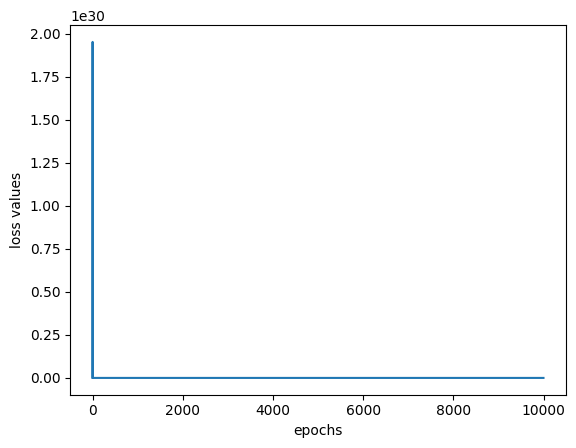

In [48]:
import matplotlib.pyplot as plt

# Assuming loss_history is a list of tensors
cpu_loss_history = []
cpu_loss_history = [tensor.detach().cpu() for tensor in loss_history]

plt.plot(cpu_loss_history) 
plt.xlabel('epochs')
plt.ylabel('loss values')
plt.show()